In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from spectral import *
import spectral.io.envi as envi

In [2]:
data_ref = envi.open('10a_101012-120551_refl_ss.hdr', '10a_101012-120551_refl_ss.dat')
data = np.array(data_ref.load())
print (data.shape) # wavelength1043-2486 nm in 230 bands

(285, 200, 230)


ImageView object:
  Display bands       :  (0, 200, 220)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.5314581394195557]
    G: [0.0, 0.561603307723999]
    B: [0.0, 0.4880259037017822]

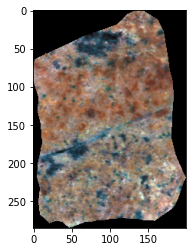

In [3]:
imshow(data, (0, 200, 220)) 

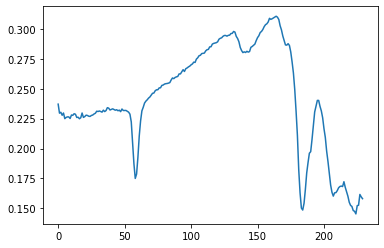

In [4]:
spectrum = data[100,100,:]
plt.plot(spectrum)
plt.show()

In [5]:
pixels = data.reshape((57000, 230))
print (pixels.shape)

(57000, 230)


In [6]:
imagedf=pd.DataFrame(pixels)

## Mineral Mapping using KMEANS

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(imagedf)
imagedf['minerals'] = kmeans.labels_

In [9]:
imagenpy=imagedf.to_numpy()
print (imagenpy.shape)

(57000, 231)


In [10]:
classified=imagenpy.reshape(285, 200, 231)

In [11]:
image=classified[:, :, 230]

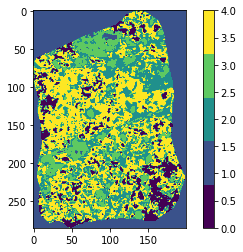

In [50]:
plt.imshow(image,  cmap=plt.cm.get_cmap('viridis',5))
plt.colorbar()

## Mineral Mapping using PCA

(0.0, 10.0)

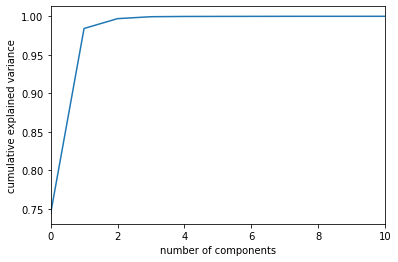

In [52]:
from sklearn.decomposition import PCA
pca = PCA().fit(imagedf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim([0,10])

In [56]:
pca = PCA(n_components=2)
test=pca.fit_transform(imagedf)

In [57]:
print (test.shape)
PCAclass=test.reshape(285, 200, 2)

(57000, 2)


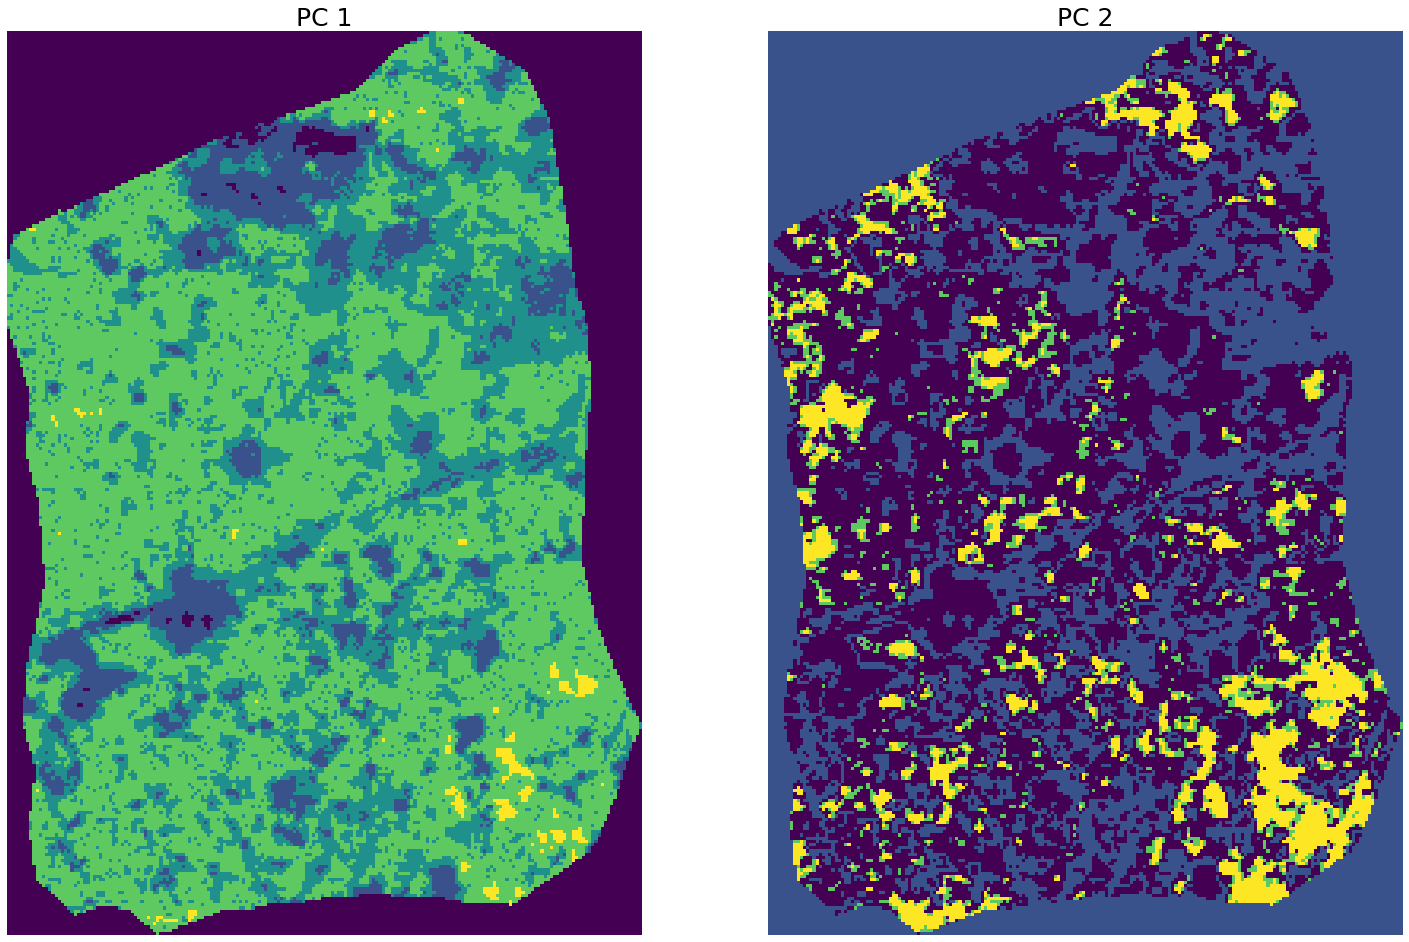

In [58]:
fig,axes = plt.subplots(1,2,figsize=(25,20),sharex='all',
                        sharey='all')

for i in range (2):
    axes[i].imshow(PCAclass[:, :, i],cmap=plt.cm.get_cmap('viridis', 5))
    axes[i].set_title('PC '+str(i+1),fontsize=25)
    axes[i].axis('off')
